In [ ]:
import pandas as pd
df = pd.read_csv('/content/cltv_prediction_dataset.csv')
print(df.head())

   CustomerID  Age  Gender  Location  AnnualIncome  PurchaseFrequency  \
0           1   59    Male  Suburban     110630.54               7.84   
1           2   51  Female  Suburban      38454.21               4.99   
2           3   34    Male     Rural      60455.88               5.60   
3           4   50  Female     Urban      89313.75               6.82   
4           5   22  Female  Suburban      59595.81               6.70   

   AverageOrderValue  TotalPurchases  CustomerTenure WebsiteEngagement  \
0             378.18              56               6            Medium   
1             173.80              87               6            Medium   
2             409.52              53               2              High   
3             129.10              97               1               Low   
4              21.55              25               6            Medium   

   CustomerServiceInteractions  MarketingSpend      CLTV  
0                            3         9899.24  39428.86 

In [ ]:
print("\nDataFrame Information:")
print(df.info())


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5000 non-null   int64  
 1   Age                          5000 non-null   int64  
 2   Gender                       5000 non-null   object 
 3   Location                     5000 non-null   object 
 4   AnnualIncome                 5000 non-null   float64
 5   PurchaseFrequency            5000 non-null   float64
 6   AverageOrderValue            5000 non-null   float64
 7   TotalPurchases               5000 non-null   int64  
 8   CustomerTenure               5000 non-null   int64  
 9   WebsiteEngagement            5000 non-null   object 
 10  CustomerServiceInteractions  5000 non-null   int64  
 11  MarketingSpend               5000 non-null   float64
 12  CLTV                         5000 non-null   float64

In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        CustomerID          Age   AnnualIncome  PurchaseFrequency  \
count  5000.000000  5000.000000    5000.000000         5000.00000   
mean   2500.500000    43.557600   84579.774078            5.28389   
std    1443.520003    15.000803   37327.844800            2.74580   
min       1.000000    18.000000   20057.340000            0.50000   
25%    1250.750000    31.000000   52047.545000            2.95000   
50%    2500.500000    44.000000   83914.420000            5.35500   
75%    3750.250000    57.000000  116919.307500            7.69250   
max    5000.000000    69.000000  149919.630000           10.00000   

       AverageOrderValue  TotalPurchases  CustomerTenure  \
count        5000.000000     5000.000000      5000.00000   
mean          259.269188       49.831600         5.00420   
std           139.385858       28.473359         2.57074   
min            20.030000        1.000000         1.00000   
25%           137.557500       26.000000         3.00000 

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID                     0
Age                            0
Gender                         0
Location                       0
AnnualIncome                   0
PurchaseFrequency              0
AverageOrderValue              0
TotalPurchases                 0
CustomerTenure                 0
WebsiteEngagement              0
CustomerServiceInteractions    0
MarketingSpend                 0
CLTV                           0
dtype: int64


In [ ]:
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['CustomerID', 'Age', 'Gender', 'Location', 'AnnualIncome',
       'PurchaseFrequency', 'AverageOrderValue', 'TotalPurchases',
       'CustomerTenure', 'WebsiteEngagement', 'CustomerServiceInteractions',
       'MarketingSpend', 'CLTV'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['WebsiteEngagement'] = label_encoder.fit_transform(df['WebsiteEngagement'])

# Check the dataframe
df.head()

,CustomerID,Age,Gender,Location,AnnualIncome,PurchaseFrequency,AverageOrderValue,TotalPurchases,CustomerTenure,WebsiteEngagement,CustomerServiceInteractions,MarketingSpend,CLTV
0,1,59,1,1,110630.54,7.84,378.18,56,6,2,3,9899.24,39428.86
1,2,51,0,1,38454.21,4.99,173.80,87,6,2,10,4488.68,42055.91
2,3,34,1,0,60455.88,5.60,409.52,53,2,0,3,4733.96,23695.16
3,4,50,0,2,89313.75,6.82,129.10,97,1,1,11,1162.88,17164.33
4,5,22,0,1,59595.81,6.70,21.55,25,6,2,7,4561.40,15767.03


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Columns to scale
columns_to_scale = [
    'Age',
    'AnnualIncome',
    'PurchaseFrequency',
    'AverageOrderValue',
    'TotalPurchases',
    'CustomerTenure',
    'CustomerServiceInteractions',
    'MarketingSpend'
]

# Step 1: Apply StandardScaler
scaler_standard = StandardScaler()
df[columns_to_scale] = scaler_standard.fit_transform(df[columns_to_scale])

# Step 2: Handle negative values (shift data to positive if needed)
for column in columns_to_scale:
    min_value = df[column].min()
    if min_value < 0:
        df[column] = df[column] + abs(min_value) + 1

# Step 3: Apply MinMaxScaler to scale between 0 and 1
scaler_minmax = MinMaxScaler()
df[columns_to_scale] = scaler_minmax.fit_transform(df[columns_to_scale])

# Check the scaled dataframe
print(df.head())


   CustomerID       Age  Gender  Location  AnnualIncome  PurchaseFrequency  \
0           1  0.803922       1         1      0.697456           0.772632   
1           2  0.647059       0         1      0.141664           0.472632   
2           3  0.313725       1         0      0.311088           0.536842   
3           4  0.627451       0         2      0.533307           0.665263   
4           5  0.078431       0         1      0.304465           0.652632   

   AverageOrderValue  TotalPurchases  CustomerTenure  WebsiteEngagement  \
0           0.746239        0.561224           0.625                  2   
1           0.320394        0.877551           0.625                  2   
2           0.811539        0.530612           0.125                  0   
3           0.227258        0.979592           0.000                  1   
4           0.003167        0.244898           0.625                  2   

   CustomerServiceInteractions  MarketingSpend      CLTV  
0                    

In [ ]:
import numpy as np

# Creating new features
# Purchase Value Ratio (How much customers spend compared to their income)
df['PurchaseValueRatio'] = df['AverageOrderValue'] / df['AnnualIncome']

# Customer Engagement Score (Combining WebsiteEngagement and CustomerServiceInteractions)
df['CustomerEngagementScore'] = df['WebsiteEngagement'] * 0.7 + df['CustomerServiceInteractions'] * 0.3

# Adjust CustomerTenure based on the year
current_year = 2024  # You can dynamically use datetime for this
df['YearsWithCompanyAdjustment'] = df['CustomerTenure'] + (current_year - 2023)

# Marketing Spend Efficiency (How much marketing spend leads to purchases)
df['MarketingSpendEfficiency'] = df['MarketingSpend'] / df['TotalPurchases']

# Income per Purchase
df['IncomePerPurchase'] = df['AnnualIncome'] / df['TotalPurchases']

# Customer Churn Risk (Higher churn risk if PurchaseFrequency is low, tenure is short, and engagement is low)
df['CustomerChurnRisk'] = np.where(
    (df['PurchaseFrequency'] < 1) & (df['CustomerTenure'] < 2) & (df['WebsiteEngagement'] < 1),
    1,  # High risk of churn
    0   # Low risk
)

# Check the new features
print(df.head())


   CustomerID       Age  Gender  Location  AnnualIncome  PurchaseFrequency  \
0           1  0.803922       1         1      0.697456           0.772632   
1           2  0.647059       0         1      0.141664           0.472632   
2           3  0.313725       1         0      0.311088           0.536842   
3           4  0.627451       0         2      0.533307           0.665263   
4           5  0.078431       0         1      0.304465           0.652632   

   AverageOrderValue  TotalPurchases  CustomerTenure  WebsiteEngagement  \
0           0.746239        0.561224           0.625                  2   
1           0.320394        0.877551           0.625                  2   
2           0.811539        0.530612           0.125                  0   
3           0.227258        0.979592           0.000                  1   
4           0.003167        0.244898           0.625                  2   

   CustomerServiceInteractions  MarketingSpend      CLTV  PurchaseValueRatio  \


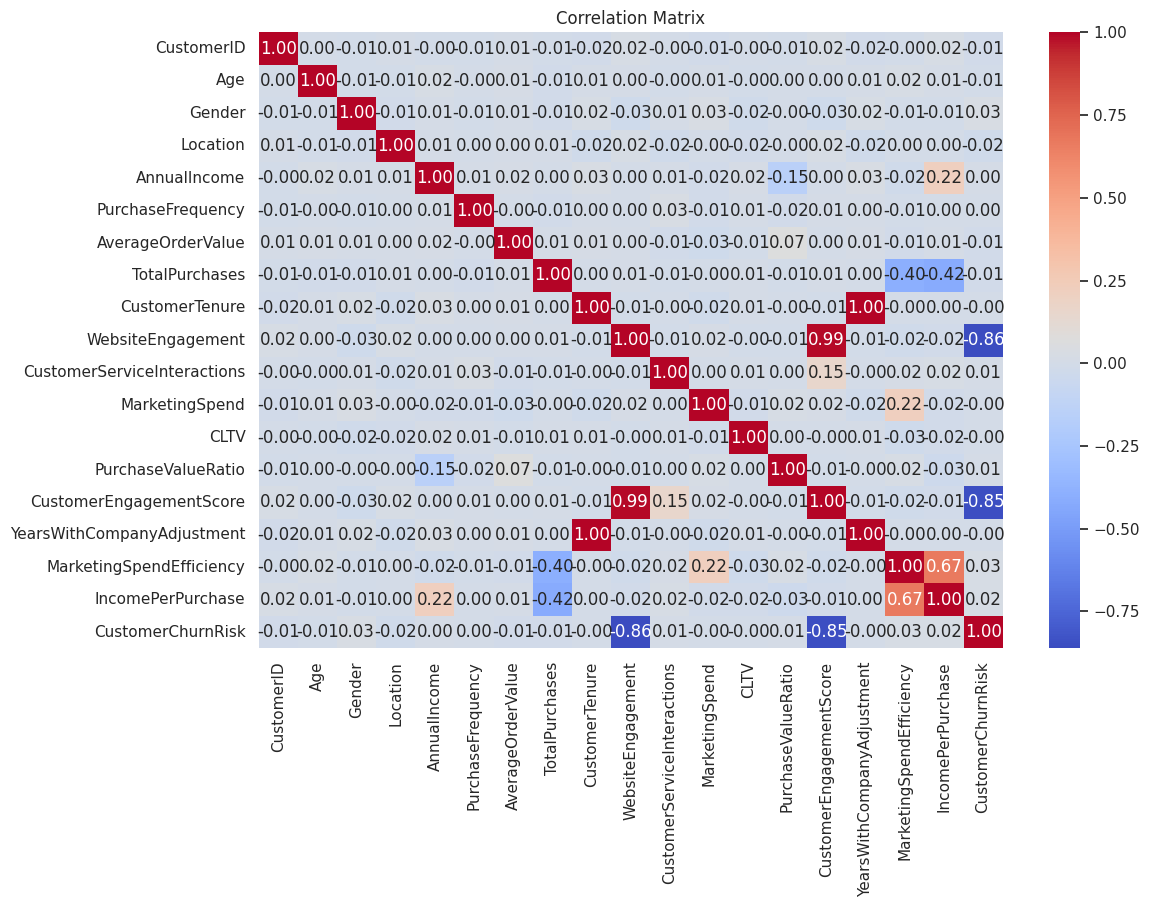

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
threshold = 0.9

# Find columns that have a correlation higher than the threshold
high_corr = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr.add(colname)

# Print the columns to consider dropping
print(f"Highly correlated columns: {high_corr}")

Highly correlated columns: {'YearsWithCompanyAdjustment', 'CustomerEngagementScore'}


In [ ]:
# Drop one of the highly correlated columns
df = df.drop(columns=['CustomerEngagementScore'])

# Check the new dataframe structure
print(df.head())


   CustomerID       Age  Gender  Location  AnnualIncome  PurchaseFrequency  \
0           1  0.803922       1         1      0.697456           0.772632   
1           2  0.647059       0         1      0.141664           0.472632   
2           3  0.313725       1         0      0.311088           0.536842   
3           4  0.627451       0         2      0.533307           0.665263   
4           5  0.078431       0         1      0.304465           0.652632   

   AverageOrderValue  TotalPurchases  CustomerTenure  WebsiteEngagement  \
0           0.746239        0.561224           0.625                  2   
1           0.320394        0.877551           0.625                  2   
2           0.811539        0.530612           0.125                  0   
3           0.227258        0.979592           0.000                  1   
4           0.003167        0.244898           0.625                  2   

   CustomerServiceInteractions  MarketingSpend      CLTV  PurchaseValueRatio  \


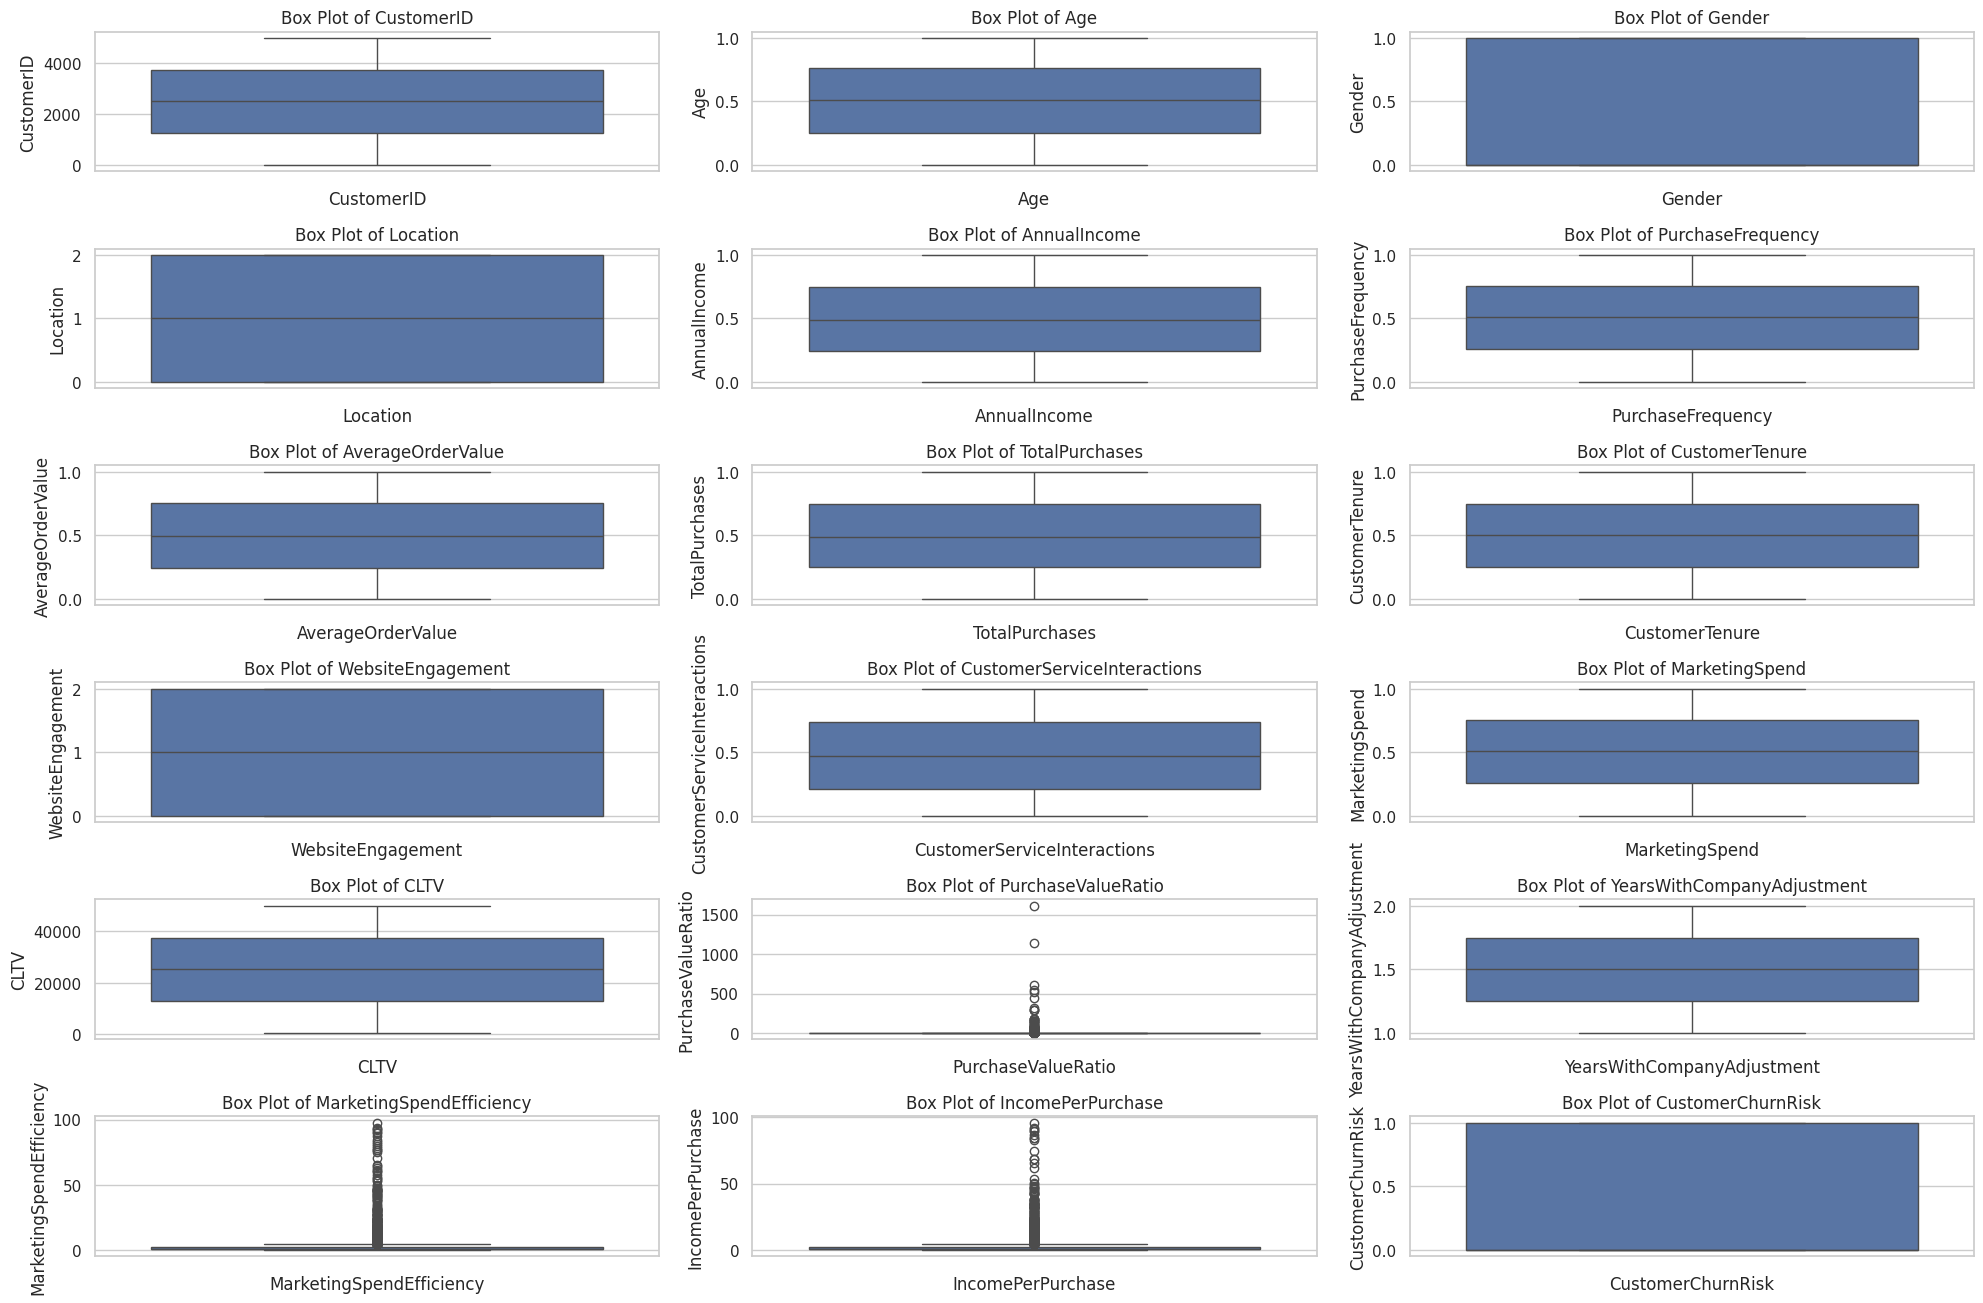

In [ ]:
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")

# Iterate through each numerical column to create box plots
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(data=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    if column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        # Filtering out the rows where values are outside the IQR bounds
        return data[~((data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR)))]
    else:
        print(f"Column {column} does not exist in the DataFrame.")
        return data

# List of numerical columns for outlier removal (can be adjusted as needed)
numerical_cols = [
    'AnnualIncome', 'PurchaseFrequency', 'AverageOrderValue', 'TotalPurchases',
    'CustomerTenure', 'WebsiteEngagement', 'CustomerServiceInteractions',
    'MarketingSpend', 'PurchaseValueRatio', 'YearsWithCompanyAdjustment',
    'MarketingSpendEfficiency', 'IncomePerPurchase'
]

# Apply the IQR function to remove outliers for each numerical column
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

# Resetting the index to maintain a clean DataFrame after outlier removal
df.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(df.head())


   CustomerID       Age  Gender  Location  AnnualIncome  PurchaseFrequency  \
0           1  0.803922       1         1      0.697456           0.772632   
1           2  0.647059       0         1      0.141664           0.472632   
2           3  0.313725       1         0      0.311088           0.536842   
3           4  0.627451       0         2      0.533307           0.665263   
4           5  0.078431       0         1      0.304465           0.652632   

   AverageOrderValue  TotalPurchases  CustomerTenure  WebsiteEngagement  \
0           0.746239        0.561224           0.625                  2   
1           0.320394        0.877551           0.625                  2   
2           0.811539        0.530612           0.125                  0   
3           0.227258        0.979592           0.000                  1   
4           0.003167        0.244898           0.625                  2   

   CustomerServiceInteractions  MarketingSpend      CLTV  PurchaseValueRatio  \


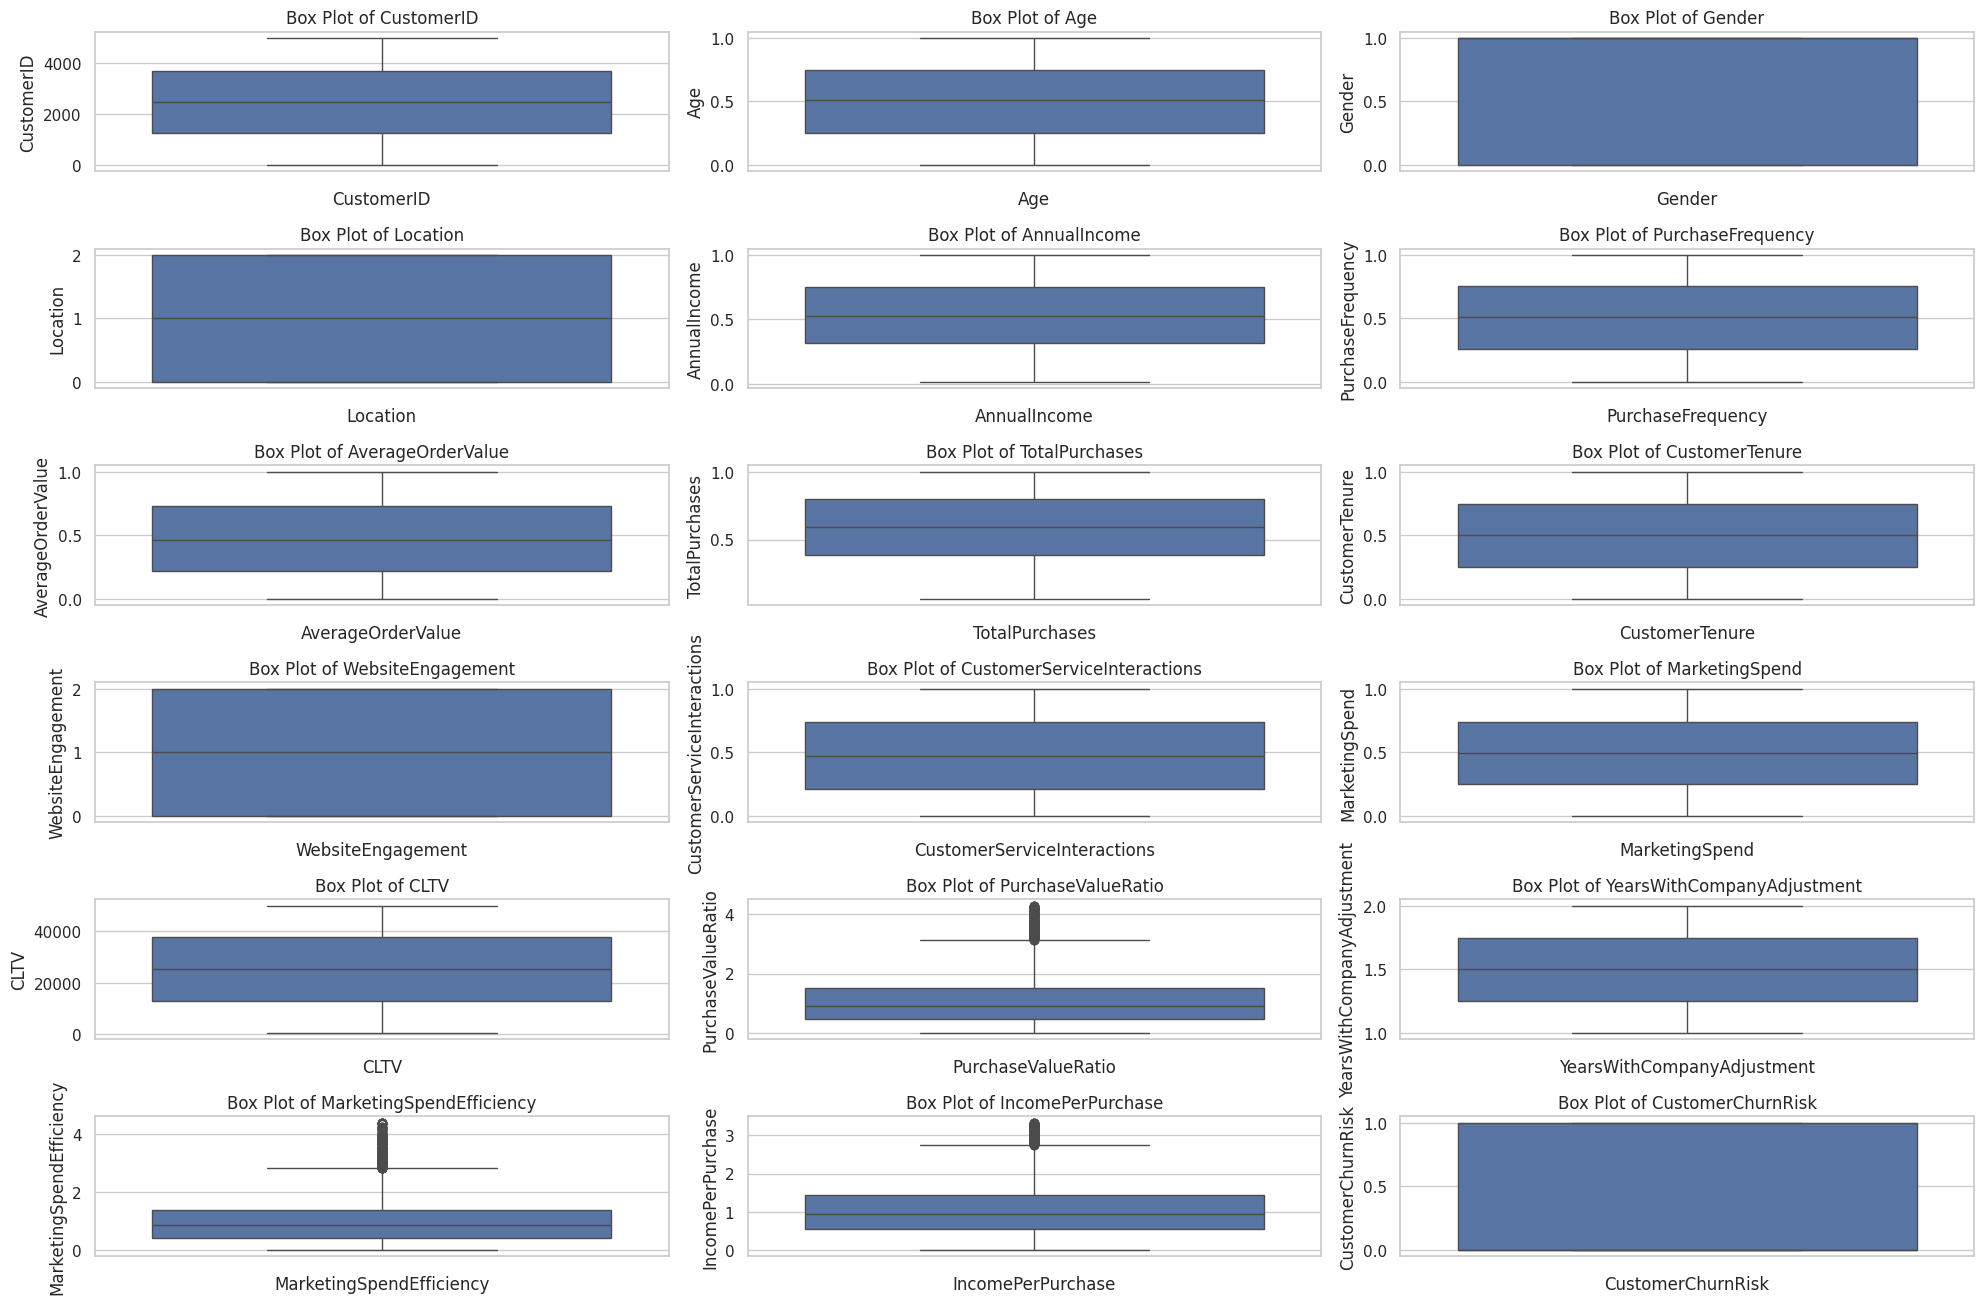

In [ ]:
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")

# Iterate through each numerical column to create box plots
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(data=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['CLTV'])  # Dropping the target column (CLTV)
y = df['CLTV']  # The target column (CLTV)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (2866, 17) (2866,)
Testing set shape: (717, 17) (717,)


Mean Squared Error (MSE): 212412226.02709398
Root Mean Squared Error (RMSE): 14574.368803728481
R-squared (R2): -0.007874899767242871
                             Coefficient
CustomerID                      0.102971
Age                          -507.458222
Gender                       -586.336911
Location                     -594.099527
AnnualIncome                 2379.947779
PurchaseFrequency             967.825564
AverageOrderValue            -190.514655
TotalPurchases              -2414.871847
CustomerTenure                -56.798308
WebsiteEngagement            -430.149652
CustomerServiceInteractions  -435.904993
MarketingSpend               -767.572264
PurchaseValueRatio           -470.896715
YearsWithCompanyAdjustment    -56.798308
MarketingSpendEfficiency     -449.269231
IncomePerPurchase            -668.000438
CustomerChurnRisk           -1217.870152


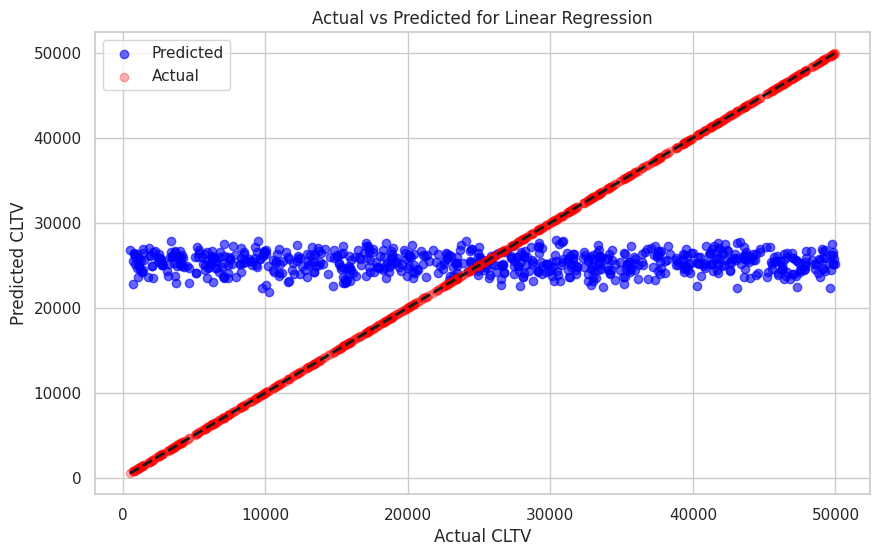

<Figure size 1000x600 with 0 Axes>

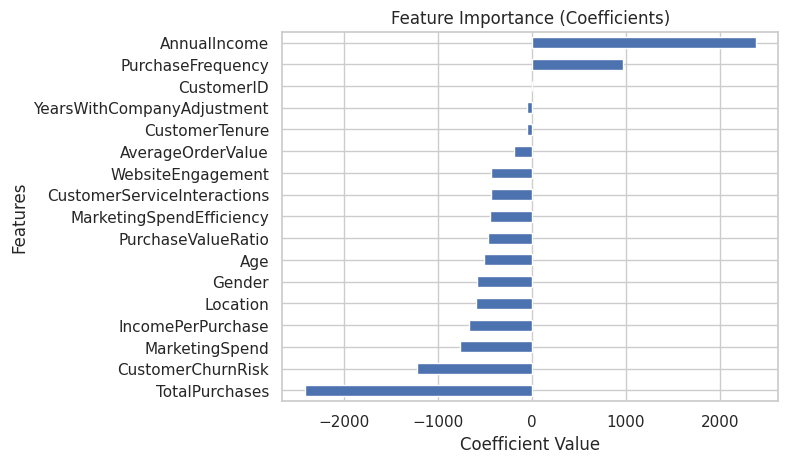

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Get the model coefficients (feature importance)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plot Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.6)
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual CLTV')
plt.ylabel('Predicted CLTV')
plt.title('Actual vs Predicted for Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Plot feature importance (coefficients)
plt.figure(figsize=(10, 6))
coefficients.sort_values(by='Coefficient', ascending=True).plot(kind='barh', legend=False)
plt.title('Feature Importance (Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

Mean Squared Error (MSE): 443543899.53523344
Root Mean Squared Error (RMSE): 21060.48193976656
R-squared (R2): -1.104571717210968
Feature Importance:
                             Importance
CustomerID                     0.126711
PurchaseFrequency              0.093887
AverageOrderValue              0.089695
AnnualIncome                   0.088777
MarketingSpendEfficiency       0.086332
MarketingSpend                 0.077953
TotalPurchases                 0.075445
PurchaseValueRatio             0.067765
IncomePerPurchase              0.066076
Age                            0.064895
CustomerServiceInteractions    0.050098
Location                       0.029042
YearsWithCompanyAdjustment     0.027035
CustomerTenure                 0.022042
Gender                         0.019460
WebsiteEngagement              0.009913
CustomerChurnRisk              0.004874


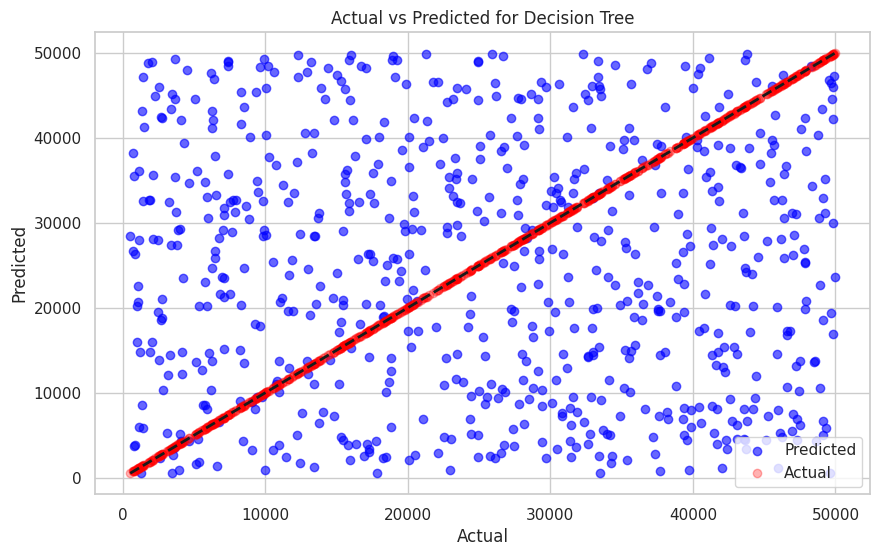

<Figure size 1000x600 with 0 Axes>

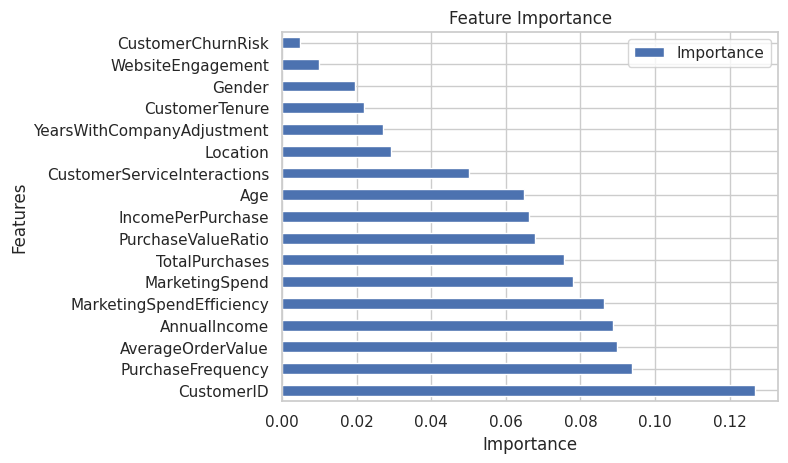

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Initialize and train the model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Feature importance visualization
feature_importances = pd.DataFrame(model.feature_importances_, X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importances)

# Plot Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.6)
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Decision Tree')
plt.grid(True)
plt.legend()
plt.show()

# Plot Feature Importance
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Random Forest Mean Squared Error (MSE): 214442815.0808337
Random Forest Root Mean Squared Error (RMSE): 14643.866124792105
Random Forest R-squared (R2): -0.01750984299666558
                             Importance
CustomerID                     0.102261
PurchaseFrequency              0.096600
MarketingSpend                 0.083343
MarketingSpendEfficiency       0.082954
PurchaseValueRatio             0.082256
IncomePerPurchase              0.081162
AverageOrderValue              0.080604
Age                            0.080591
AnnualIncome                   0.079213
TotalPurchases                 0.064327
CustomerServiceInteractions    0.063811
YearsWithCompanyAdjustment     0.026895
CustomerTenure                 0.024396
Location                       0.019526
WebsiteEngagement              0.014996
Gender                         0.010941
CustomerChurnRisk              0.006125


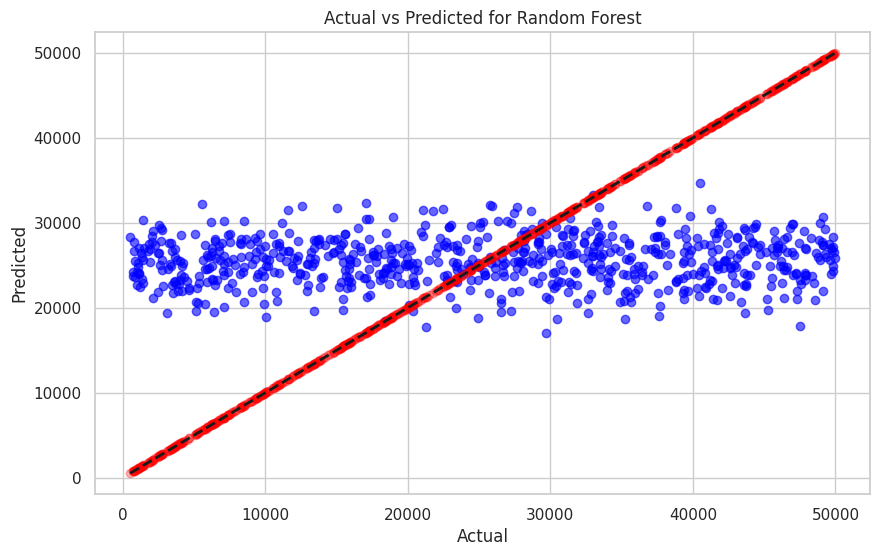

<Figure size 1000x600 with 0 Axes>

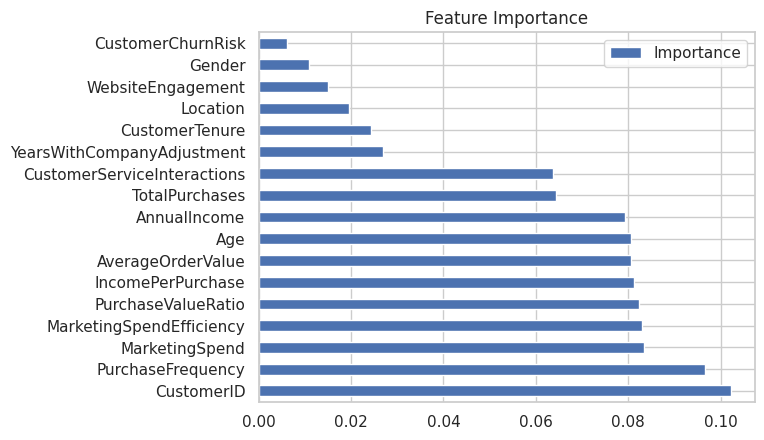

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_rf_pred)

# Print the results
print("Random Forest Mean Squared Error (MSE):", rf_mse)
print("Random Forest Root Mean Squared Error (RMSE):", rf_rmse)
print("Random Forest R-squared (R2):", rf_r2)

# Feature importance
importance = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(importance)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, color='blue', label='Predicted', alpha=0.6)
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Random Forest')
plt.grid(True)
plt.show()

# Plot Feature Importance
plt.figure(figsize=(10, 6))
importance.plot(kind='barh')
plt.title('Feature Importance')
plt.show()
